### 전체적인 흐름 
I. 데이터 검토  
II. 독립변수(X), 종속변수(y) 선정  
III. train set, test set 분리  
IV. 정규화  
V. 모델학습  

### 작업 경로 설정

In [1]:
import os
print(os.getcwd())
os.chdir('/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/자격증/빅분기/BigData_data_최종본(1022) (1)')
print(os.getcwd())

/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/자격증/빅분기
/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/자격증/빅분기/BigData_data_최종본(1022) (1)


## 2.1 분석 데이터 검토

In [2]:
import pandas as pd
data = pd.read_csv('breast-cancer-wisconsin.csv', encoding = 'utf-8')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [3]:
data['Class'].value_counts(sort = False)

0    444
1    239
Name: Class, dtype: int64

In [4]:
print(data.shape)

(683, 11)


## 2.2 특성(x)과 레이블(y) 나누기

In [5]:
# 방법1 : 특성이름으로 특성 데이터셋(X) 나누기
X1 = data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
           'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
           'Normal_Nucleoli','Mitoses']]
# 방법2 : 특성 위치값으로 특성 데이터셋(X) 나누기
X2 = data[data.columns[1:10]]
# 방법3 : loc 함수로 특성 데이터셋(X) 나누기 (단, 불러올 특성이 연달아 있어야 함)
X3 = data.loc[:, 'Clump_Thickness' : 'Mitoses']

In [6]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(683, 9)
(683, 9)
(683, 9)


In [7]:
# [[]] 대괄호를 2번 사용하면 데이터프레임의 형태가 됨
y = data[["Class"]]

In [8]:
print(y.shape)

(683, 1)


## 2.3 train-test 데이터셋 나누기

In [9]:
from sklearn.model_selection import train_test_split
# stratify = y : 훈련데이터와 테스트데이터를 구분할 때, 레이블의 범주 비율에 맞게 하라는것
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify = y, random_state = 42)

In [10]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


## 2.4. 정규화

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [12]:
X_train

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
131,3,1,1,1,2,1,2,2,1
6,1,1,1,1,2,10,3,1,1
0,5,1,1,1,2,1,3,1,1
269,1,1,1,1,2,1,3,1,1
56,5,2,3,1,6,10,5,1,1
...,...,...,...,...,...,...,...,...,...
515,7,4,4,3,4,10,6,9,1
216,4,1,1,3,1,5,2,1,1
312,10,1,1,1,2,10,5,4,1
11,2,1,1,1,2,1,2,1,1


### 가. train data의 정규화

In [13]:
# 특성치 min-max(최소 최대) 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [14]:
X_scaled_minmax_train

array([[0.22222222, 0.        , 0.        , ..., 0.11111111, 0.11111111,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.44444444, 0.33333333,
        0.        ],
       [0.11111111, 0.        , 0.        , ..., 0.11111111, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11111111, 0.        ,
        0.        ]])

In [15]:
# 표준화
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [16]:
X_scaled_standard_train

array([[-0.47431688, -0.69363091, -0.7319088 , ..., -0.59692549,
        -0.2653868 , -0.35486772],
       [-1.17417349, -0.69363091, -0.7319088 , ..., -0.17768564,
        -0.60088814, -0.35486772],
       [ 0.22553973, -0.69363091, -0.7319088 , ..., -0.17768564,
        -0.60088814, -0.35486772],
       ...,
       [ 1.97518125, -0.69363091, -0.7319088 , ...,  0.66079406,
         0.40561588, -0.35486772],
       [-0.82424519, -0.69363091, -0.7319088 , ..., -0.59692549,
        -0.60088814, -0.35486772],
       [-1.17417349, -0.69363091, -0.7319088 , ..., -0.59692549,
        -0.60088814, -0.35486772]])

In [17]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-> 최소값 0, 최대값 1

In [18]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,6.938894e-18,6.938894e-18,-2.775558e-17,-2.775558e-17,-4.857226e-17,6.938894e-18,-2.081668e-17,-2.775558e-17,-1.734723e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


-> 평균이 0, 표준편차가 1로 됨

### 나. test data의 정규화

In [19]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


## 2.5 모델 학습

모델 훈련 -> 모델 예측 -> 모델 정확도

In [21]:
# ML 알고리즘 모듈 불러오기 및 학습데이터에 적용(LogisticRegression)
# 여기서는 min-max 정규화 데이터로 분석
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

/opt/anaconda3/envs/big/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [22]:
# score은 정확도(accuracy)를 확인할 수 있는 명령어
# 분류 예측 결과(0,1)을 'pred_train'에 저장(할당), score로 정확도(accuracy) 확인
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.97265625

> 사이킷런의 머신러닝 훈련 시 주요 명령어   

| 목적 | 명령어 | 특성치(X) 설정 | 레이블(y) 설정 |
|: --- :|: ---- :|: ------------ :|: ----------- :|
| 모델훈련 | model.fit(X,y) | O | O |
| 모델예측(범주) | model.predict(X) | O | O |
| 모델예측(확률) | model.predict_proba(X) | O | X |
| 모델정확도 | model.score(X, y) | O | O |

In [23]:
# 테스트 데이터에 학습데이터의 모델 적용, 'pred_test'에 저장(할당), score로 정확도(accuracy) 확인
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.9590643274853801

In [24]:
# 학습데이터의 혼동행렬 보기(정분류, 오분류 교차표)
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print(f"훈련데이터 오차행렬 : \n {confusion_train}")

훈련데이터 오차행렬 : 
 [[328   5]
 [  9 170]]


In [25]:
print(f'정분류율 : {(328+170)/(328+170+5+9)}')
print(f'오분류율 : {(5+9)/(328+170+5+9)}')

정분류율 : 0.97265625
오분류율 : 0.02734375


In [26]:
# 테스트데이터의 혼동행렬 보기(정분류, 오분류 교차표)
confusion_test = confusion_matrix(y_test, pred_test)
print(f"테스트데이터 오차행렬 : \n {confusion_test}")

테스트데이터 오차행렬 : 
 [[106   5]
 [  2  58]]


In [27]:
print(f'정분류율 : {(106+58)/(106+5+2+58)}')
print(f'오분류율 : {(5+2)/(106+5+2+58)}')

정분류율 : 0.9590643274853801
오분류율 : 0.04093567251461988


In [28]:
# 훈련 데이터의 평가지표 상세 확인
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print(f'분류예측 레포트 : \n {cfreport_train}')

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [29]:
# 테스트 데이터의 평가지표 상세 확인
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [30]:
# ROC 지표 산출을 위한 라이브러리 및 선식
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923423423423423

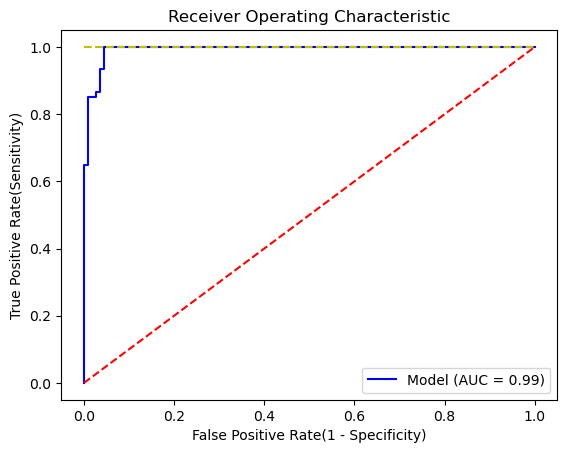

In [31]:
# ROC Curve 그리기
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

---
## 2-6. 예측값 병합 및 저장

In [ ]:
# 학습데이터의 예측범주, 예측확률 컬럼을 생성하여 'y_train' 데이터셋에 추가
prob_train=model.predict_proba(X_scaled_minmax_train)
y_train[['y_pred']]=pred_train
y_train[['y_prob0', 'y_prob1']]=prob_train
y_train

In [ ]:
# 테스트 데이터의 예측범주, 예측확률 컬럼을 생성하여 'y_test' 데이터셋에 추가
prob_test=model.predict_proba(X_scaled_minmax_test)
y_test[['y_pred']]=pred_test
y_test[['y_prob0', 'y_prob1']]=prob_test
y_test

In [ ]:
# 테스트 데이터의 특성치(X_test)와 레이블 및 예측치(y_test)를 병합
Total_test=pd.concat([X_test, y_test], axis=1)
Total_test

In [ ]:
# csv파일로 내보내기 및 저장
Total_test.to_csv("classfication_test.csv")